# Principle Component Analysis and Clustering of Hospital Quarterly Financial Data
### Jeevitha Bandi, Doga Karabey, Elling Payne

## 1 Introduction

This project is about finding patterns in how hospitals across Washington manage their finances. Every quarter, hospitals report a range of financial and operational data from how much revenue they bring in to how many beds they have in use. Our goal is to explore this information and see if we can spot groups of hospitals that behave similarly, or maybe outliers that stand apart. We're hoping that what we find can help make sense of how hospitals operate and where they might improve.

We’re working with a public dataset called the *Hospital Financial Quarterly Aggregate Report*, which includes detailed records from hospitals across the state. It covers everything from patient revenue and expenses to things like charity care and bad debt. It also includes numbers related to patient services, like how many people were discharged and how long they stayed. The metrics are also broken down by various care types, such as acute care or skilled nursing facility (SNF) care, and payment methods such as self-pay, medicaid, or commercial insurance. Each record holds financial metrics for a given hospital in a given year and quarter.

The unsupervised methods applied in our analysis include:

- **Principal Component Analysis (PCA)**: to reduce dimensionality and visualize the major axes of variance among hospitals  
- **K-Means Clustering**: to identify peer groups based on similar financial and operational characteristics  
- **Hierarchical Clustering**: to explore nested similarity structures among hospitals  
- **Matrix Completion**: to enable more reliable clustering and visualization 

Throughout, we focused on tying everything back to what it actually means for hospitals and healthcare in the real world. This wasn’t just about running models, it was about using the data to ask better questions and maybe find a few answers too.


## 2.1 Technical Background - Principle Component Analysis (PCA)

Principle component decomposition is an extension of Eigen decomposition for arbitrary matrices, which allows exploring the shape of a feature space by finding the directions of greatest variance. The basic idea is that, even if matrix $A_{n\times p}$ is not square, we can consider instead $A^TA$ and $AA^T$, which are square. We can then decompose as $A = U \Sigma V^T$, where the columns of $U$ are the Eigen vectors of $AA^T$ or _left singular vectors_ of $A$, and the columns of $V$ are the Eigen vectors of $A^TA$ or _right singular vectors_ of $A$. $\Sigma$ is a diagonal matrix which contains the square roots of the Eigen values of $A^TA$, also called the _singular values_ of $A$. The _principle components_ or _principle component loadings_ of $A$ are given by the columns of $V$, while $U\Sigma$ give the _principle component scores_ of each record in $A$. The scores indicate the positions of data points in principle component space, while the loadings incidate the directions of the principle components, as well as how much each feature contributes to the principle components. The principle components are orthonormal, and are linear combinations of the features. The first principle component is the direction of greatest variance. We can find the first principle component $Z_1 = A \vec{\phi}_1$ by maximizing the variance of $Z_1$ over all choices of $\vec{\phi}_1$ while constraining the $L$-2 norm of $Z_1$ to be $1$. The squares of the _singular values_ give the percent of variance explained by each principle component. In practice some values on the tail of the diagonal of $\Sigma$ will be $0$, which indicates that the variance was already fully explained by the previous principle components. Therefore, it is common practice to truncate $U$, $\Sigma$, and $V$ so that only principle components that explain a portion of variance are included. These truncated matrices can still perfectly represent the original data. By truncating $U$, $V$ and $\Sigma$ further, it is possible to create _low rank approximations_ of $A$, which converges to $A$ as the number of principle components used for approximation increases. Since the distance is important to PCA, features are typically scaled to have a mean of $0$ and variance of $1$ before decomposition.

## 2.3 Technical Background - K-Means Clustering

K-means clustering is a way to group similar data points together when you don’t have any labels or categories to start with. It works by looking at the data and trying to find **centers** (called *centroids*) that represent the middle of each group. Every data point gets assigned to the group whose center it’s closest to. Then the centers get updated, and the process repeats until the model converges.

One of the key characteristics with K-means is that you have to decide how many clusters you want in advance, this number is called **K**. Picking the right K is important. One common way to do it is by using the **elbow method**, where you try different values of K and look for the point where adding more clusters doesn’t give you much improvement.

K-means works best when:
- The clusters are round and fairly evenly sized
- The data doesn’t have a lot of outliers
- The clusters don’t overlap too much

It’s also worth noting that K-means starts with random guesses for where the centers should be. So unless you set a seed or run the algorithm multiple times and pick the best result, you might get slightly different outcomes each time.

To see how well the clustering worked, we usually look at how tight the points are within each group. This is measured by a metric called the **within-cluster sum of squares** lower values mean the points are closer to their center, which is the desired outcome.

The final result gives you two main things:
- Which group each data point belongs to
- Where the center of each group is

From there, you can dig into the groups and figure out what they have in common, and why they might matter in the real world.

Overall, K-means is a solid go-to method when you want a quick, simple way to find patterns in your data. It’s not perfect and it doesn’t work well with odd-shaped clusters or noisy data but when used right, it can give you a clear, useful starting point.

## 2.4 Technical Background - Agglomerative Hierarchical Clustering

In hierarchical clustering (AHC) the goal is build a hierarchical map of relationships between clusters. In agglomerative clustering, this is done iteratively and starting from the lowest level, which is relationships between individual data points. At each iteration, the two most similar clusters are linked, and this link informs the next iteration that the two clusters are now one. This process continues until all clusters have been linked together, with each iteration presenting a clustering with fewer and fewer clusters. Which two clusters are most similar at a given step depends mainly on the _linkage type_ and the _distance measure_ used. The most common _distance measure_ is the Euclidean distance between two points in feature space. However, distance measures based on the correlation between two points are also common. The _linkage type_ refers to which points in each cluster matter for calculating cluster distance, as well as how they are aggregated into a single distance metric for every cluster pair. Three of the most common are _single linkage_, _complete linkage_, and _average linkage_.

When compared with K-means clustering, the process of hierarchical clustering produces multiple clustering solutions with the cluster counts ranging from one to the size of the data set, rather than requiring that the number of clusters be set beforehand. As a bonus, the process of building the hierarchy can be represented nicely in a _dendogram_. The height of a dendogram corresponds to the similarity between the most sinmilar clusters. A choice of clustering step corresponds to cutting the dendogram at a particular height. Another way of looking at it is that cutting the dendogram at a particular height is in fact a selection of the minimum cluster dissimilarity to consider two clusters truly different. Then only those cluster splits that results in clusters at least that dissimilar will be retained.

### 2.4.1 Single Linkage
When using single linkage, the linkage distance between two clusters only depends on the closest pair of points in the two clusters. This might be useful in a scenario in which the closest points in a cluster are the most important for understanding the relationships of interest. For instance, one might be able to imagine a social process in which two groups are more likely to come into contact if they each have one member that can kick things off with the someone in the other group. If all we were interested in was attempting to group friend groups, it is concievable that given two groups, the most similar members matter more than members that are dissimilar. However, in practice this is fairly uncommon, and single linkage tends to result in pretty unbalanced clusters. This is because the largest two clusters at any given step are the most likely to be the closest.


### 2.4.2 Complete Linkage
In complete linkage, the distance between two clusters is based on the pair of points which are furthest from eachother. This might be considered the most conservative of the three linkage types mentioned in that it tends to enforce a more balanced clustering. In contrast with single linkage, the largest two clusters are now the least likely to be the most similar. However, in some scenarios this approach might result in single outliers being merged into a cluster before another cluster which by other measures might be considered more similar.

### 2.4.3 Average Linkage
Average linkage considers the average of all of the pairwise similarity scores between points in the two clusters. This is not to be confused with _centroid linkage_, which is not used in this project. Average linkage is a balanced approach compared with single and complete linkage. Like complete linkage, it tends to create more balanced clusters than single linkage, but to a lesser degree. The following figure from James et al shows an example of dendograms for each of the linkage types discussed [2].

![Dendogram Examples from ISLP](data/islp_plots/ISLP_dendograms_for_various_linkage.png)

## 3 Methods

The data was processed by first identifying and removing categorical columns including license number, hospital name, city, and quarter. One feature, the professional fee expense, was missing for ~66% of the records, which appears to correspond with a change in financial reporting requirements in the last few years. This feature was also dropped. Then the remaining numeric data was scaled to have a mean of 0 and a variance of 1. This scaled feature set was used for PCA, matrix completion, and clustering. For matrix completion, matrices with various percentages of missing data rows were created from the original data. Then the efficacy of matrix completion was assesed by comparing the accuracies of completion using several different ranks for low rank approximation. Clustering models were assessed through two main methods. First, within group sum of squares and silhouette score were computed for each model and compared. Second, plots of the clusterings along with information from the cluster centroids and the size of clusters was used to interpret and validate the cluster models. Computations and modeling were preformed with Python [3] and Scikit-Learn [4]

## 4.2 Results - K-Means Clustering

We started by cleaning and preprocessing the data, focusing on key financial and operational indicators like total revenue, licensed beds, discharges, and outpatient visits. Missing values were filled using column averages, and extreme outliers were removed to keep the clustering process stable and meaningful.

After scaling the data, we used the elbow method and silhouette score to choose the number of clusters. Both pointed to **4 clusters** as a good fit it gave a clear enough separation without overcomplicating things.

We ran K-means with 4 clusters and used PCA to visualize the results in two dimensions. The plot showed four fairly distinct groups, which aligned with what we’d expect based on hospital size and activity. We also added a bar plot to show how hospitals were distributed across the clusters.

To understand what makes each cluster different, we looked at four key features using box plots. Some clusters clearly had much higher revenue or more outpatient visits, while others operated on a smaller scale.

Here’s a quick summary of the average values for each group:

| Cluster | Number of Hospitals | Avg Revenue      | Avg Beds | Avg Discharges | Avg Outpatient Visits |
| ------- | ------------------- | ---------------- | -------- | -------------- | --------------------- |
| 0       | 1,634               | \$29,091,042.12  | 43       | 209            | 14,994                |
| 1       | 423                 | \$207,160,930.17 | 145      | 1,288          | 48,376                |
| 2       | 94                  | \$376,617,738.74 | 234      | 1,700          | 66,862                |
| 3       | 124                 | \$415,235,282.11 | 301      | 3,034          | 53,870                |


These results show a clear progression across clusters in terms of size and patient volume. Cluster 0 includes the smallest hospitals, likely rural or community based with limited capacity and lower finances. Clusters 1 and 2 represent medium and large scale operations, while Cluster 3 contains the largest and most resource intensive hospitals with high inpatient activity.

This clustering gives us a perspective for understanding the diversity of hospital operations across the dataset. It also lays the foundation for further analysis, such as identifying which types of hospitals are most efficient or where resources might be disproportionately overused.

Loading and preprocessing data...

Number of hospitals after outlier removal: 2275
Scaling data...
Finding optimal number of clusters...


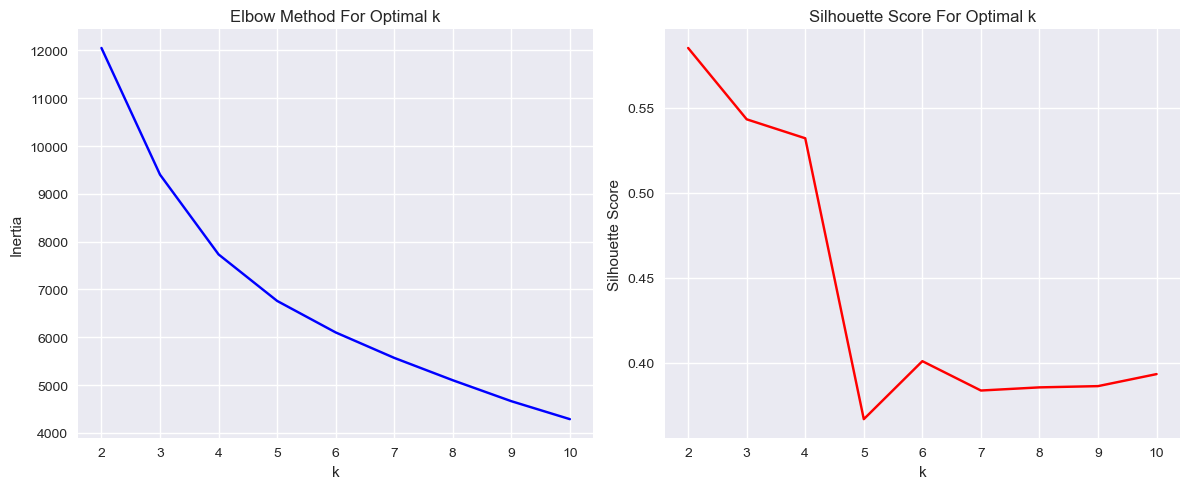

Performing k-means clustering with 4 clusters...
Creating visualizations...


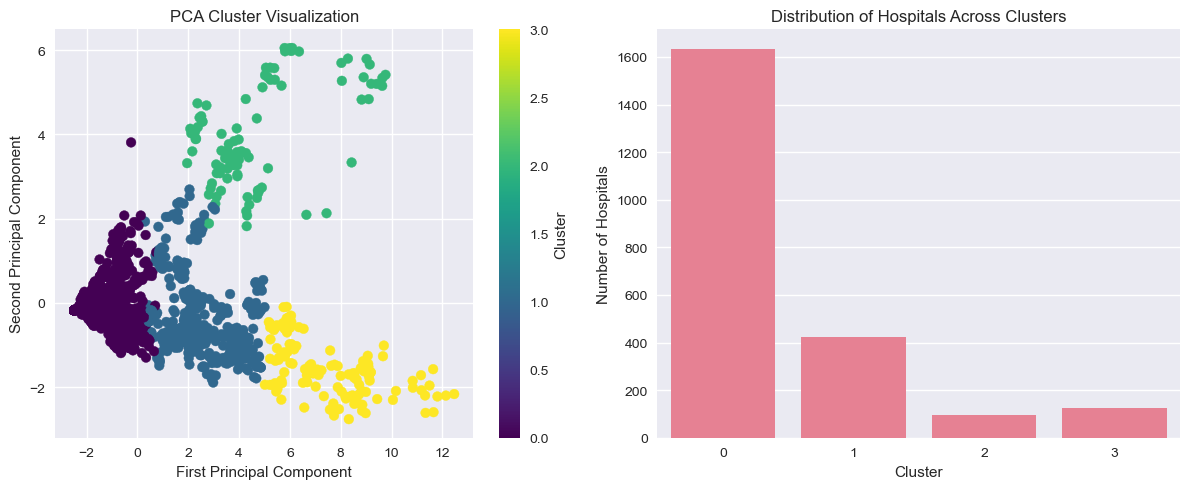

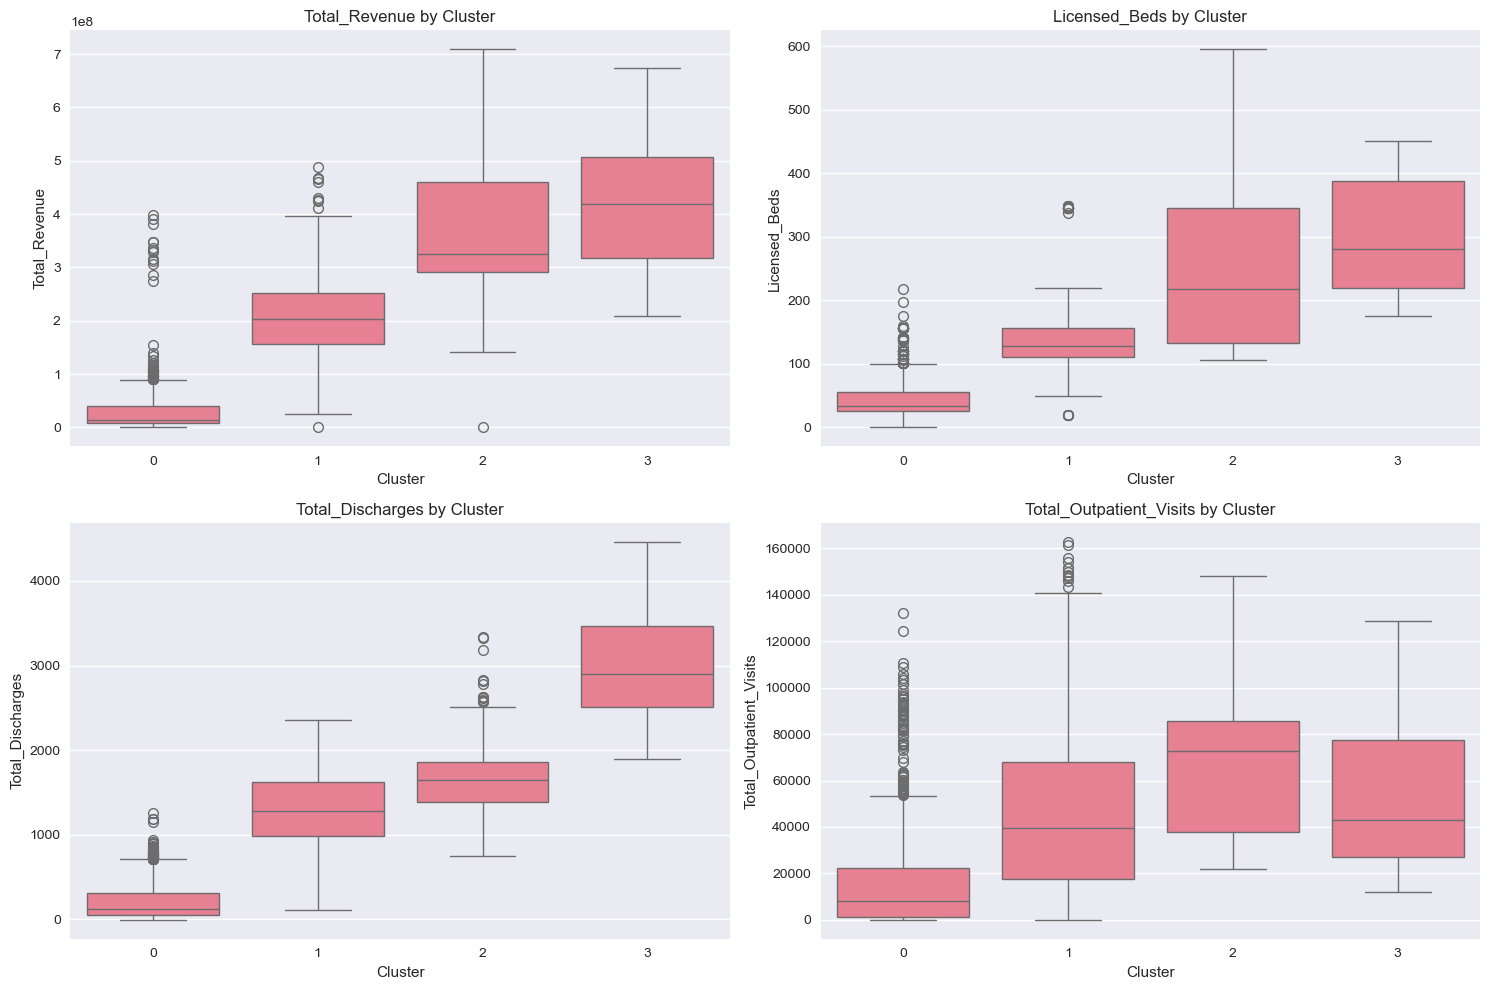


Cluster Statistics:

Cluster 0:
Number of hospitals: 1634
Average Total Revenue: $29,091,042.12
Average Licensed Beds: 43
Average Total Discharges: 209
Average Outpatient Visits: 14994

Cluster 1:
Number of hospitals: 423
Average Total Revenue: $207,160,930.17
Average Licensed Beds: 145
Average Total Discharges: 1288
Average Outpatient Visits: 48376

Cluster 2:
Number of hospitals: 94
Average Total Revenue: $376,617,738.74
Average Licensed Beds: 234
Average Total Discharges: 1700
Average Outpatient Visits: 66862

Cluster 3:
Number of hospitals: 124
Average Total Revenue: $415,235,282.11
Average Licensed Beds: 301
Average Total Discharges: 3034
Average Outpatient Visits: 53870


In [8]:
import os
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

random.seed(123)

def load_and_preprocess_data(file_path):
    """Load and preprocess the hospital data."""
    print("Loading and preprocessing data...")
    df = pd.read_csv(file_path)
    
    columns_to_use = [
        'Licensed_Beds', 'Total_Discharges', 'Total_Patient_Days',
        'Total_Revenue', 'Total_Operating_Expenses',
        'Total_Medicare_Discharges', 'Total_Medicaid_Discharges',
        'Total_Commercial_Discharges', 'Total_Other_Discharges',
        'Emergency_Room_Visits', 'Total_Outpatient_Visits'
    ]
    
    # Missing Values Set to Mean
    df[columns_to_use] = df[columns_to_use].fillna(df[columns_to_use].mean())
    
    # Remove outliers beyond 3 standard deviations
    for column in columns_to_use:
        mean = df[column].mean()
        std = df[column].std()
        df = df[abs(df[column] - mean) <= (3 * std)]
    
    print(f"\nNumber of hospitals after outlier removal: {len(df)}")
    
    return df, columns_to_use

def scale_data(df, columns_to_use):
    """Scale the data using StandardScaler."""
    print("Scaling data...")
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns_to_use])
    return scaled_data, scaler

def find_optimal_clusters(scaled_data):
    """Find the optimal number of clusters using the elbow method."""
    print("Finding optimal number of clusters...")
    inertias = []
    silhouette_scores = []
    K = range(2, 11)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    
    # Elbow
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    
    # Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal k')
    plt.tight_layout()
    plt.show()
    
    # Define K (we can change this I just found 4 to be decent)
    optimal_k = 4
    return optimal_k

def perform_clustering(scaled_data, optimal_k):
    """Perform k-means clustering."""
    print(f"Performing k-means clustering with {optimal_k} clusters...")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    return clusters, kmeans

def visualize_clusters(scaled_data, clusters, df, columns_to_use):
    """Create various visualizations of the clusters."""
    print("Creating visualizations...")
    
    # 1. PCA 
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
    plt.title('PCA Cluster Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    
    # 2. Cluster distribution
    plt.subplot(1, 2, 2)
    sns.countplot(x=clusters)
    plt.title('Distribution of Hospitals Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Hospitals')
    plt.tight_layout()
    plt.show()

    
    # 3. Box plots for features
    key_features = ['Total_Revenue', 'Licensed_Beds', 'Total_Discharges', 'Total_Outpatient_Visits']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(key_features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=clusters, y=df[feature])
        plt.title(f'{feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

def main():
 
    file_path = os.path.join(os.getcwd(), 'data', 'raw', 'Hospital_Financial_Quarterly_Aggregate_Report_20250520.csv')
    
    df, columns_to_use = load_and_preprocess_data(file_path)
    
    # Scale
    scaled_data, scaler = scale_data(df, columns_to_use)
    
    # Find optimal number of clusters
    optimal_k = find_optimal_clusters(scaled_data)
    
    # Clustering
    clusters, kmeans = perform_clustering(scaled_data, optimal_k)
    
    df['Cluster'] = clusters
    
    # Visualize
    visualize_clusters(scaled_data, clusters, df, columns_to_use)
    
    # Cluster statistics
    print("\nCluster Statistics:")
    for i in range(optimal_k):
        cluster_data = df[df['Cluster'] == i]
        print(f"\nCluster {i}:")
        print(f"Number of hospitals: {len(cluster_data)}")
        print(f"Average Total Revenue: ${cluster_data['Total_Revenue'].mean():,.2f}")
        print(f"Average Licensed Beds: {cluster_data['Licensed_Beds'].mean():.0f}")
        print(f"Average Total Discharges: {cluster_data['Total_Discharges'].mean():.0f}")
        print(f"Average Outpatient Visits: {cluster_data['Total_Outpatient_Visits'].mean():.0f}")

if __name__ == "__main__":
    main() 

## 4.3 Results - Agglomerative Hierarchical Clustering

In general, with our current data preprocessing procedures, hierarchical clustering does not yield incredibly useful results. Of the three linkage types used, only complete linkage produced multiple clusters with more than one financial record. All three linkage types resulted in extremely unbalanced clusters on the data set, with all silhouette scores being essentially zero. As such, only plots of within group sum of squares and cluster scatter plots are included to compare models with different numbers of clusters.

### 4.3.1 Single Linkage

![Single Linkage Clusters by K](data/hierarchical_clustering/single_linkage_clusters.png)

![Single Linkage WSS by K](data/hierarchical_clustering/single_linkage_wss_vs_k.png)

![Single Linkage Subset Dendogram](data/hierarchical_clustering/single_linkage_dendogram.png)

### 4.3.2 Complete Linkage

The best hierarchical model seemed to used complete linkage and 4 clusters, which results in most of the data points in one group with a small offshoot group that includes 10 financial records. This smaller group of records was mostly from Yakima Valley Memorial, with one record from Confluence Health: Central Washington Hospital. This group was mostly distinguished by a higher than average focus on swing beds, and also by a higher than average number of patients paying out of pocket or with commercial insurance. The model with 6 clusters is also relatively interesting. It identifies the same small cluster in the 4 cluster model and identifies one additional small group of size 8. This additional cluster includes records from Snoqualmie Valley Hospital, which appears to be larger than average by most metrics. However, both of the small groups are composed of multiple records from only one ore two hospitals. As such they still really represent outliers rather than useful groups. The following table shows selected values from the normalized centroids of clusters larger than 1 in the 6-cluster model. Cluster 0 is the main cluster, while clusters 1 and 2 are the smaller clusters. Looking at the plot of within group sum of squares, there is a slight elbow at 4 and 6 clusters, which might lend some weak support to these clusterings. However, the silhouette scores contradict this and reduce confidence in the clustering.

| Cluster | Licensed Beds | Total Discharges | Swing Bed Total Revenue | Total Self-Pay Discharges | Total Revenue | Total Operating Expenses |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 0 | 0.001999981 | -0.001821415 | -0.044833685 | -0.019696759 | 4.11E-05 | -0.001246769 |
| 1 | -0.699417057 | 0.071811687 | 11.59348497 | 3.930027732 | -0.665500625 | -0.568140766 |
| 2 | 0.434480284 | 0.803617515 | -0.218571816 | 2.124113904 | 0.851412059 | 0.796355729 |

![Complete Linkage Clusters by K](data/hierarchical_clustering/complete_linkage_clusters.png)

![Complete Linkage WSS by K](data/hierarchical_clustering/complete_linkage_wss_vs_k.png)

![Complete Linkage Subset Dendogram](data/hierarchical_clustering/complete_linkage_dendogram.png)

### 4.3.3 Average Linkage

![Average Linkage Clusters by K](data/hierarchical_clustering/avg_linkage_clusters.png)

![Average Linkage WSS by K](data/hierarchical_clustering/avg_linkage_wss_vs_k.png)

![Average Linkage Subset Dendogram](data/hierarchical_clustering/avg_linkage_dendogram.png)

## 5.1 Discussion - Loading, Singular Values, and Scree Plots

![Scree Plots](data/pca/scree_plots.png)

![Ordered Importance of Features in PC1](data/pca/absolute_loadings_vs_feature_ordered_desc.png)

## 5.3 Discussion - Data in PCA Space

To better understand the structure of our data, we used **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset and project it into a 2D space. These two principal components represent the directions where the data varies the most. By plotting the hospitals using just these two components, we were able to get a much clearer view of how the different hospitals group together.

In the PCA scatter plot, we saw that the clusters identified by K-means separated fairly well in this reduced space. There were four visibly distinct groups, each occupying its own region of the plot. While there was some overlap at the edges which is expected in real-world data the majority of points within each cluster were clearly grouped. This suggests that the underlying structure captured by PCA aligns well with the groupings K-means found, and that those groupings likely reflect real differences between types of hospitals.

Overall, PCA helped us zoom out and see the big picture. It confirmed that the hospitals naturally fall into a few broad categories, which we captured with our clusters. It also showed that while individual features can provide some insight, they don’t tell the full story, especially in complex datasets like this one. By combining PCA with K-means clustering, we were able to both reduce complexity and uncover meaningful structure in a way that raw plots just couldn’t.

## 5.4 Discussion - Clustering Interpretations

### 5.4.1 K-Means Clustering

After running the clustering algorithm, we grouped hospitals into four distinct clusters based on features like revenue, number of beds, patient discharges, and outpatient visits. When we looked more closely at the underlying data, clear patterns began to emerge.

**Cluster 0** includes the majority of hospitals (1,634 in total), but they are by far the smallest on average. These hospitals have around 43 licensed beds, just over 200 discharges, and roughly 15,000 outpatient visits. Their average total revenue is just under $30 million. This group likely represents smaller community or rural hospitals operating with limited capacity and lower patient turnover.

**Cluster 1** is a step up in terms of scale, with 423 hospitals. These facilities average 145 beds, 1,288 discharges, and close to 48,000 outpatient visits. Their average revenue is significantly higher at over $200 million. This group likely includes mid-sized regional hospitals that serve larger populations and offer a broader range of services.

**Cluster 2**, although smaller in count (94 hospitals), represents large-scale operations. With an average of 234 beds, 1,700 discharges, and nearly 67,000 outpatient visits, these hospitals bring in over $375 million in revenue on average. These could be large teaching hospitals or major regional hubs.

**Cluster 3** stands out as the most resource-intensive group. With 124 hospitals, this cluster has the highest number of licensed beds (301), the largest number of discharges (3,034), and an average revenue over $415 million. Interestingly, their outpatient numbers are slightly lower than Cluster 2, suggesting that they may focus more on complex inpatient care. These hospitals likely include the largest urban medical centers or academic hospitals.

Overall, the clusters don’t just capture size they highlight different models of care delivery. Some hospitals handle high volumes of patients with moderate resources, while others are high-capacity institutions with major inpatient operations. These distinctions help us better understand the roles hospitals play across the state, from small community care centers to massive urban hospitals.


What makes these clusters useful is that they reflect meaningful operational differences. They show us how hospitals group not just by size, but by how they allocate resources, what kind of care they provide, and the volume of services they deliver. These groupings help us interpret the data in a more human way not just as rows and columns, but as different types of institutions serving different roles within the healthcare system.

### 5.4.2 Agglomerative Clustering

The hope is that the clusterings here will represent meaningful clusters where the clustering unit is not hospitals but individual financial quarters at various hospitals. As such, some expected outcomes are that different quarters from the same hospital are likely to be in the same cluster, unless some drastic change occured at that hospital. This is visible in the dendogram for agglomerative clustering with complete linkage, in which quarterly records from the same hospital typically occur in the same groups and are very closely linked. Looking at a couple of examples from the complete linkage dendogram,

## 6 Conclusions

## 7 References

[1] C. Baranowski (DOH), _Hospital financial quarterly aggregate report_, Accessed:2025-05, WA State Department of Health, Office of Community HealthSystems, 2025. [Online]. Available: https://data.wa.gov/health/Hospital-Financial-Quarterly-Aggregate-Report/ivej-p22w.

[2] G. James, D. Witten, T. Hastie, R. Tibshirani, and J. Taylor, _An Introduction to Statistical Learning with Applications in Python_. Springer, 2023.

[3] P. C. Team, _Python: A dynamic, open source programming language_, Python Software Foundation, 2023. [Online]. Available: https://www.python.org/.

[4] F. Pedregosa, G. Varoquaux, A. Gramfort, et al., _Scikit-learn: Machine learning in python_, 2011. [Online]. Available: https://scikit-learn.org/.

[5] C. R. Harris, K. J. Millman, S. J. van der Walt, et al., _Array programming with numpy_, 2020. [Online]. Available: https://numpy.org/.

[6] W. McKinney, _Data structures for statistical computing in python_, 2010. [Online]. Available: https://pandas.pydata.org/.

[7] A. Mendible, _5322_, 2025. [Online]. Available: https://github.com/mendible/5322.

[8] J. Hunter, _Matplotlib: A 2d graphics environment_, Computing in Science & Engineering, vol. 9, no. 3, pp. 90–95, 2007. doi: 10.1109/MCSE.2007.55.

[9] M. Waskom, _Seaborn: Statistical data visualization_, 2025. [Online]. Available: https://seaborn.pydata.org.